In [1]:
from google.colab import files
uploaded = files.upload()

Saving datalab_export_2025-09-10 11_01_49.csv to datalab_export_2025-09-10 11_01_49.csv


In [7]:
import pandas as pd
import numpy as np
bank_data=pd.read_csv('datalab_export_2025-09-10 11_01_49.csv')
print(bank_data.head())

   index  age        job  marital    education  default housing loan  \
0      0   56  housemaid  married     basic.4y       no      no   no   
1      1   57   services  married  high.school  unknown      no   no   
2      2   37   services  married  high.school       no     yes   no   
3      3   40     admin.  married     basic.6y       no      no   no   
4      4   56   services  married  high.school       no      no  yes   

     contact month  ... campaign  pdays  previous     poutcome  emp.var.rate  \
0  telephone   may  ...        1    999         0  nonexistent           1.1   
1  telephone   may  ...        1    999         0  nonexistent           1.1   
2  telephone   may  ...        1    999         0  nonexistent           1.1   
3  telephone   may  ...        1    999         0  nonexistent           1.1   
4  telephone   may  ...        1    999         0  nonexistent           1.1   

  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         93.994        

In [17]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(bank_data.drop('y', axis=1), drop_first=True)
y = bank_data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(80, 35) (20, 35)


In [20]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

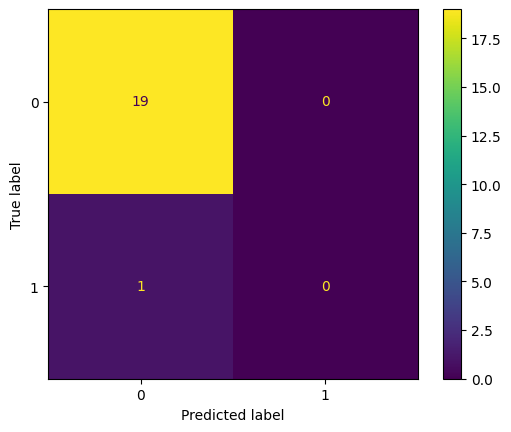

In [21]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [24]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.95
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


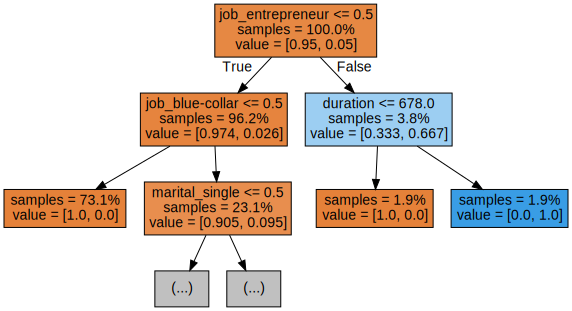

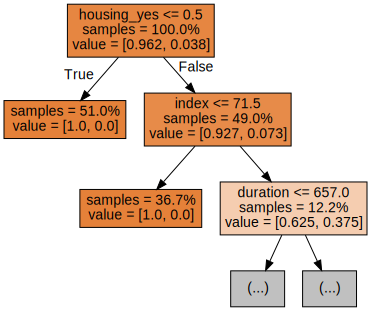

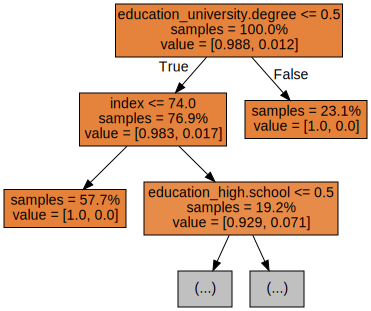

In [27]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(3):
    tree = model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)